In [ ]:
import shutil
import os

directory_path = '/content/dataset'

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"The directory '{directory_path}' has been removed.")
else:
    print(f"The directory '{directory_path}' does not exist.")

The directory '/content/dataset' does not exist.


# Download and Extract the dataset

In [ ]:
!gdown --id 15CHt2ueS4c7emHpmzFHC3c0TGd51Mnvz -O /content/dataset.zip
!unzip /content/dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/lasagna/479a9234-bc9.jpg  
  inflating: /content/dataset/train/lasagna/47bfa87b-fa4.jpg  
  inflating: /content/dataset/train/lasagna/47d63f15-0d4.jpg  
  inflating: /content/dataset/train/lasagna/482c7c0a-e01.jpg  
  inflating: /content/dataset/train/lasagna/48e4b7e3-f1f.jpg  
  inflating: /content/dataset/train/lasagna/492a3c02-ca2.jpg  
  inflating: /content/dataset/train/lasagna/49320e1b-a14.jpg  
  inflating: /content/dataset/train/lasagna/495aa734-3eb.jpg  
  inflating: /content/dataset/train/lasagna/49a3a9dd-b2d.jpg  
  inflating: /content/dataset/train/lasagna/49a40501-678.jpg  
  inflating: /content/dataset/train/lasagna/4a8cafda-417.jpg  
  inflating: /content/dataset/train/lasagna/4afe2d85-af7.jpg  
  inflating: /content/dataset/train/lasagna/4b51e154-4df.jpg  
  inflating: /content/dataset/train/lasagna/4bd8ec34-e7c.jpg  
  inflating: /content/dataset/train/lasagna/4bf48590-073.jpg  
  in

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')

img = ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical')

Found 24089 images belonging to 22 classes.


In [ ]:
24089/22

1094.9545454545455

In [ ]:
from collections import Counter

#class indices for all images in the training set
class_indices = img.classes
idx_to_class = {i : j for j, i in img.class_indices.items()}
#occurrences of each class index
class_counts = Counter(class_indices)

#size of each category
num = 0
sum = 0
for class_index, count in class_counts.items():
    class_name = idx_to_class[class_index]
    print(f'Category: {class_name}, Size: {count}')
    if count < 1095:
      num+=1
      sum += (1095 - count)
      print(1095 - count)
print(sum/num)
print(num)

Category: baked_potato, Size: 1501
Category: baklava, Size: 680
415
Category: caesar_salad, Size: 709
386
Category: cheese_sandwich, Size: 708
387
Category: cheesecake, Size: 679
416
Category: chicken, Size: 2293
Category: chicken_curry, Size: 707
388
Category: chocolate_cake, Size: 702
393
Category: donuts, Size: 2395
Category: eggs, Size: 699
396
Category: falafel, Size: 709
386
Category: fish, Size: 708
387
Category: french_fries, Size: 2286
Category: hamburger, Size: 2376
Category: hot_dog, Size: 1057
38
Category: ice_cream, Size: 705
390
Category: lasagna, Size: 693
402
Category: omelette, Size: 715
380
Category: pizza, Size: 887
208
Category: spaghetti, Size: 1509
Category: steak, Size: 681
414
Category: sushi, Size: 690
405
361.9375
16


In [ ]:
from PIL import Image

def get_image_sizes(base_dir):
    sizes = []
    for subdir, dirs, files in os.walk(base_dir):
        for file in files:
            try:
                with Image.open(os.path.join(subdir, file)) as img:
                    sizes.append(img.size)  # img.size(width, height)
            except IOError:
                print(f"Cannot open {file}")
    return sizes

base_dir = '/content/dataset/train'

image_sizes = get_image_sizes(base_dir)

size_counts = Counter(image_sizes)

for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

Cannot open 6fcf7983-225.jpg
Cannot open 1b4ed8be-285.jpg
Cannot open 052f1133-141.jpg
Cannot open 2a2a3166-2d2.jpg
Cannot open e5574159-a60.jpg
Size: (512, 384), Count: 2466
Size: (512, 512), Count: 9349
Size: (382, 512), Count: 473
Size: (384, 512), Count: 1119
Size: (512, 289), Count: 149
Size: (512, 288), Count: 139
Size: (512, 382), Count: 372
Size: (341, 512), Count: 36
Size: (308, 512), Count: 7
Size: (512, 308), Count: 19
Size: (512, 306), Count: 161
Size: (512, 464), Count: 2
Size: (512, 341), Count: 242
Size: (512, 441), Count: 1
Size: (511, 512), Count: 97
Size: (512, 511), Count: 58
Size: (288, 512), Count: 49
Size: (383, 512), Count: 38
Size: (512, 452), Count: 1
Size: (512, 334), Count: 5
Size: (512, 340), Count: 54
Size: (512, 342), Count: 56
Size: (512, 339), Count: 20
Size: (512, 307), Count: 72
Size: (512, 509), Count: 18
Size: (512, 320), Count: 2
Size: (512, 386), Count: 5
Size: (512, 453), Count: 1
Size: (306, 512), Count: 65
Size: (512, 500), Count: 10
Size: (512,

In [ ]:
def verify_images(folder_path):
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:

            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)  #open the image file
                img.verify()
            except (IOError, SyntaxError) as e:
                print('Bad file:', file_path)
                os.remove(file_path)

base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
verify_images(train_dir)


Bad file: /content/dataset/train/chicken/6fcf7983-225.jpg
Bad file: /content/dataset/train/chicken/1b4ed8be-285.jpg
Bad file: /content/dataset/train/chicken/052f1133-141.jpg
Bad file: /content/dataset/train/chicken/2a2a3166-2d2.jpg
Bad file: /content/dataset/train/chicken/e5574159-a60.jpg


In [ ]:
img = ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical')

Found 24084 images belonging to 22 classes.


# Train and validation

In [ ]:
import os
import shutil
import numpy as np

base_dir = '/content/dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
split_ratio = 0.8  # 80% for training, 20% for validation

for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)

    if os.path.isdir(class_dir):
        train_class_dir = os.path.join(train_dir, class_name)
        validation_class_dir = os.path.join(validation_dir, class_name)
        os.makedirs(validation_class_dir, exist_ok=True)

        images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        np.random.shuffle(images)  #randomness

        split_index = int(len(images) * split_ratio)
        train_images = images[:split_index]
        validation_images = images[split_index:]

        #respective directories
        for img in train_images:
            shutil.move(os.path.join(class_dir, img), os.path.join(train_class_dir, img))
        for img in validation_images:
            shutil.move(os.path.join(class_dir, img), os.path.join(validation_class_dir, img))



In [ ]:
ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical')
ImageDataGenerator().flow_from_directory(validation_dir, class_mode='categorical')

Found 19259 images belonging to 22 classes.
Found 4825 images belonging to 22 classes.


In [ ]:
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/validation'

#only rescaling
transform = ImageDataGenerator(rescale=1./255)
target_size = (256, 256)


# simple generator for validation data
validation_generator = transform.flow_from_directory(
    validation_dir,
    target_size=target_size,
    class_mode='categorical')

train_generator = transform.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical')


Found 4825 images belonging to 22 classes.
Found 19259 images belonging to 22 classes.


In [ ]:
19259/22

875.4090909090909

In [ ]:
idx_to_class = {i : j for j, i in ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical').class_indices.items()}
class_counts = Counter(ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical').classes)

#size of each category
num = 0
sum = 0
for class_index, count in class_counts.items():
    class_name = idx_to_class[class_index]
    print(f'Category: {class_name}, Size: {count}')
    if count < 875:
      num+=1
      sum += (875 - count)
      print(875 - count)
print(sum/num)
print(num)

Found 19259 images belonging to 22 classes.
Found 19259 images belonging to 22 classes.
Category: baked_potato, Size: 1200
Category: baklava, Size: 544
331
Category: caesar_salad, Size: 567
308
Category: cheese_sandwich, Size: 566
309
Category: cheesecake, Size: 543
332
Category: chicken, Size: 1830
Category: chicken_curry, Size: 565
310
Category: chocolate_cake, Size: 561
314
Category: donuts, Size: 1916
Category: eggs, Size: 559
316
Category: falafel, Size: 567
308
Category: fish, Size: 566
309
Category: french_fries, Size: 1828
Category: hamburger, Size: 1900
Category: hot_dog, Size: 845
30
Category: ice_cream, Size: 564
311
Category: lasagna, Size: 554
321
Category: omelette, Size: 572
303
Category: pizza, Size: 709
166
Category: spaghetti, Size: 1207
Category: steak, Size: 544
331
Category: sushi, Size: 552
323
288.875
16


In [ ]:
#images from the directory and apply transformations
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True
)


target_num_images = 875
base_dir = '/content/dataset/train'

for category in os.listdir(base_dir):
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)
    num_images = len(images)

    if num_images < target_num_images:
         #with augmentation
        images_to_duplicate = target_num_images - num_images
        while images_to_duplicate > 0:
            img_name = random.choice(images)
            img_path = os.path.join(category_dir, img_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in data_gen.flow(x, save_to_dir=category_dir, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= 1:  #generate 1 new image per selected image
                    break
            images_to_duplicate -= 1


In [ ]:
ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical')
ImageDataGenerator().flow_from_directory(validation_dir, class_mode='categorical')

Found 23799 images belonging to 22 classes.
Found 4825 images belonging to 22 classes.


In [ ]:
idx_to_class = {i : j for j, i in ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical').class_indices.items()}
class_counts = Counter(ImageDataGenerator().flow_from_directory(train_dir, class_mode='categorical').classes)

#size of each category
# num = 0
# sum = 0
for class_index, count in class_counts.items():
    class_name = idx_to_class[class_index]
    print(f'Category: {class_name}, Size: {count}')
#     if count < 875:
#       num+=1
#       sum += (875 - count)
#       print(875 - count)
# print(sum/num)
# print(num)

Found 23799 images belonging to 22 classes.
Found 23799 images belonging to 22 classes.
Category: baked_potato, Size: 1200
Category: baklava, Size: 869
Category: caesar_salad, Size: 870
Category: cheese_sandwich, Size: 868
Category: cheesecake, Size: 869
Category: chicken, Size: 1830
Category: chicken_curry, Size: 869
Category: chocolate_cake, Size: 870
Category: donuts, Size: 1916
Category: eggs, Size: 868
Category: falafel, Size: 870
Category: fish, Size: 869
Category: french_fries, Size: 1828
Category: hamburger, Size: 1900
Category: hot_dog, Size: 875
Category: ice_cream, Size: 866
Category: lasagna, Size: 870
Category: omelette, Size: 870
Category: pizza, Size: 874
Category: spaghetti, Size: 1207
Category: steak, Size: 869
Category: sushi, Size: 872


## Plot the images

In [ ]:
train_generator = transform.flow_from_directory(train_dir, class_mode='categorical', shuffle=True)

class_indices = train_generator.class_indices

index_to_class = {v: k for k, v in class_indices.items()}


def get_class_name(label_index):
    return index_to_class[label_index]

def plot_images(images_arr, labels, title="Images"):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 5))
    axes = axes.flatten()
    for i, (img, ax) in enumerate(zip(images_arr, axes)):
        ax.imshow(img)
        ax.axis('off')
        # Find the class with the highest probability and get its name
        label_index = labels[i].argmax()
        class_name = get_class_name(label_index)
        ax.set_title(f'Class: {class_name}')
    plt.tight_layout()
    plt.suptitle(title, fontsize=25)
    plt.show()


Found 23799 images belonging to 22 classes.


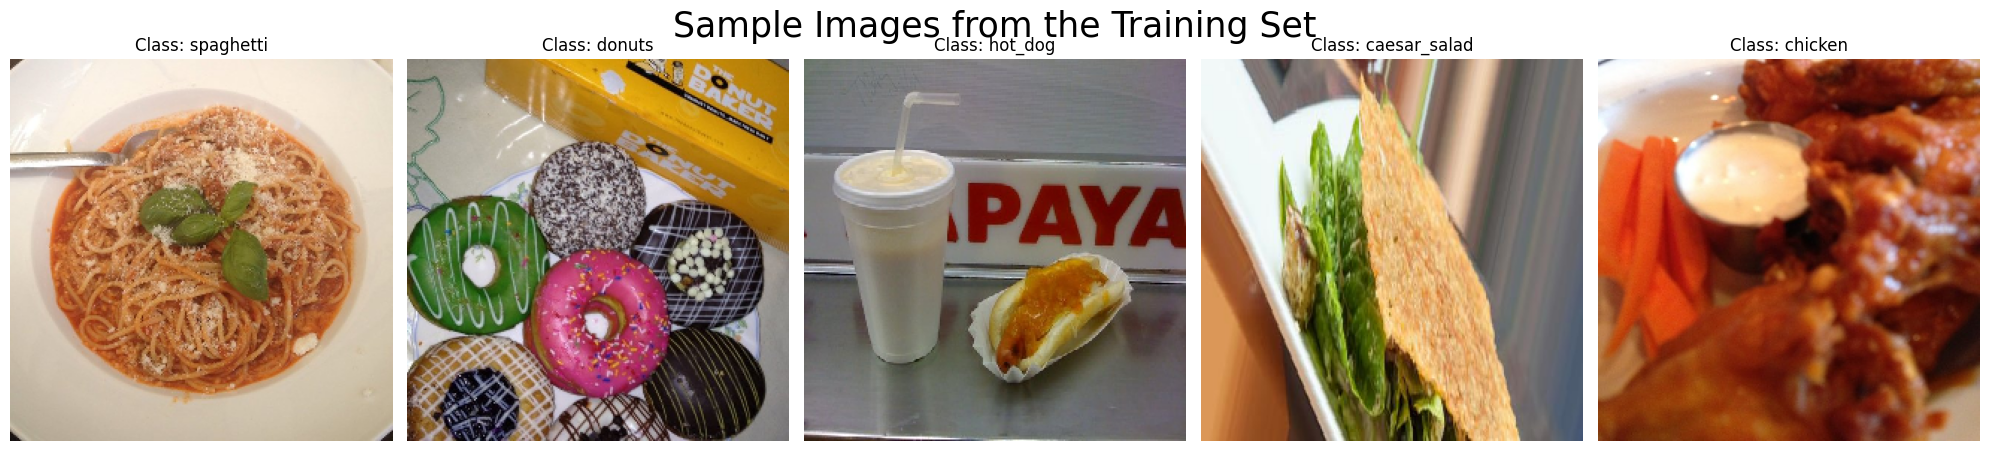

In [ ]:
import matplotlib.pyplot as plt

#batch of images from the training generator
images, labels = next(train_generator)

#5 images and their labels with class names
plot_images(images[5:10], labels[5:10], title="Sample Images from the Training Set")


In [ ]:
class_indices

{'baked_potato': 0,
 'baklava': 1,
 'caesar_salad': 2,
 'cheese_sandwich': 3,
 'cheesecake': 4,
 'chicken': 5,
 'chicken_curry': 6,
 'chocolate_cake': 7,
 'donuts': 8,
 'eggs': 9,
 'falafel': 10,
 'fish': 11,
 'french_fries': 12,
 'hamburger': 13,
 'hot_dog': 14,
 'ice_cream': 15,
 'lasagna': 16,
 'omelette': 17,
 'pizza': 18,
 'spaghetti': 19,
 'steak': 20,
 'sushi': 21}

In [ ]:
from collections import Counter

class_indices = train_generator.classes

class_counts = Counter(class_indices)

#  size of each category
for class_index, count in class_counts.items():
    class_name = index_to_class[class_index]
    print(f'Category: {class_name}, Size: {count}')


Category: baked_potato, Size: 1200
Category: baklava, Size: 869
Category: caesar_salad, Size: 870
Category: cheese_sandwich, Size: 868
Category: cheesecake, Size: 869
Category: chicken, Size: 1830
Category: chicken_curry, Size: 869
Category: chocolate_cake, Size: 870
Category: donuts, Size: 1916
Category: eggs, Size: 868
Category: falafel, Size: 870
Category: fish, Size: 869
Category: french_fries, Size: 1828
Category: hamburger, Size: 1900
Category: hot_dog, Size: 875
Category: ice_cream, Size: 866
Category: lasagna, Size: 870
Category: omelette, Size: 870
Category: pizza, Size: 874
Category: spaghetti, Size: 1207
Category: steak, Size: 869
Category: sushi, Size: 872


In [ ]:
index_to_class

{0: 'baked_potato',
 1: 'baklava',
 2: 'caesar_salad',
 3: 'cheese_sandwich',
 4: 'cheesecake',
 5: 'chicken',
 6: 'chicken_curry',
 7: 'chocolate_cake',
 8: 'donuts',
 9: 'eggs',
 10: 'falafel',
 11: 'fish',
 12: 'french_fries',
 13: 'hamburger',
 14: 'hot_dog',
 15: 'ice_cream',
 16: 'lasagna',
 17: 'omelette',
 18: 'pizza',
 19: 'spaghetti',
 20: 'steak',
 21: 'sushi'}

## Plot the classes

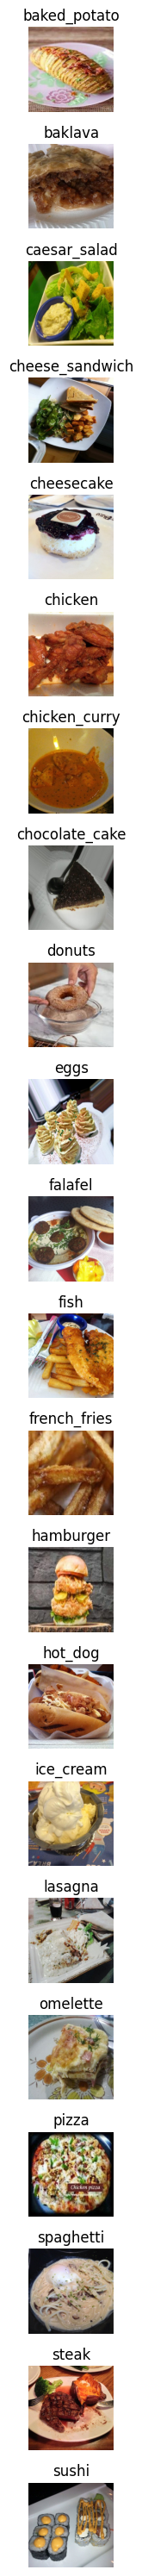

In [ ]:
import matplotlib.pyplot as plt

class_indices = train_generator.class_indices
fig, axes = plt.subplots(len(class_indices), 1, figsize=(15, 30))


for class_name, index in class_indices.items():
    class_dir = os.path.join(train_dir, class_name)
    sample_image = os.listdir(class_dir)[0]  #first image for simplicity
    img_path = os.path.join(class_dir, sample_image)
    img = load_img(img_path, target_size=target_size)

    axes[index].imshow(img)
    axes[index].set_title(class_name)
    axes[index].axis('off')

plt.tight_layout()
plt.show()


# Model Training

In [ ]:
def generator_to_data(generator, num_batches):
    X, y = [], []

    #iterate over the generator to retrieve the batches
    for _ in range(num_batches):
        imgs, labels = next(generator)
        X.append(imgs)
        y.append(labels)
    X = np.concatenate(X, axis=0)
    y = np.concatenate(y, axis=0)
    assert np.all(np.sum(y, axis=1) == 1), "labels are not properly one-hot encoded"
    assert y.shape[1] == generator.num_classes, "number of columns in y does not match the number of classes"


    return X, y


train_generator = transform.flow_from_directory(train_dir , class_mode='categorical', shuffle=True)
validation_generator = transform.flow_from_directory(validation_dir, class_mode='categorical')

train_num_batches = len(train_generator)
val_num_batches = len(validation_generator)


X_train, y_train = generator_to_data(train_generator, train_num_batches)
X_val, y_val = generator_to_data(validation_generator, val_num_batches)



(array([[[[0.5647059 , 0.5529412 , 0.48627454],
          [0.56078434, 0.5568628 , 0.4784314 ],
          [0.5647059 , 0.5529412 , 0.4784314 ],
          ...,
          [0.5686275 , 0.57254905, 0.5803922 ],
          [0.57254905, 0.5764706 , 0.58431375],
          [0.57254905, 0.5764706 , 0.58431375]],
 
         [[0.5882353 , 0.56078434, 0.48627454],
          [0.58431375, 0.5647059 , 0.48627454],
          [0.58431375, 0.5568628 , 0.48235297],
          ...,
          [0.5686275 , 0.57254905, 0.5803922 ],
          [0.5686275 , 0.57254905, 0.5803922 ],
          [0.5686275 , 0.57254905, 0.5803922 ]],
 
         [[0.58431375, 0.5529412 , 0.47058827],
          [0.58431375, 0.5529412 , 0.47058827],
          [0.5803922 , 0.54901963, 0.4666667 ],
          ...,
          [0.5686275 , 0.57254905, 0.5803922 ],
          [0.5686275 , 0.57254905, 0.5803922 ],
          [0.5686275 , 0.57254905, 0.5803922 ]],
 
         ...,
 
         [[0.427451  , 0.38823533, 0.34901962],
          [0.43137

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import keras.metrics
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
import numpy as np



# metric = keras.metrics.F1Score(average='micro', threshold=None)


class F1ScoreCallback(Callback):
    def __init__(self, validation_generator):
        super(F1ScoreCallback, self).__init__()
        self.validation_generator = validation_generator

    def on_epoch_end(self, epoch, logs=None):
        val_predict = []
        val_targ = []
        # entire validation dataset
        for _ in range(len(self.validation_generator)):
            xVal, yVal = next(self.validation_generator)
            val_predict.extend((np.asarray(self.model.predict(xVal))).round())
            val_targ.extend(yVal)

        val_predict = np.array(val_predict)
        val_targ = np.array(val_targ)
        _val_f1 = f1_score(val_targ, val_predict, average='micro')
        print(f' — val_f1: {_val_f1}')


num_classes = 22

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy') ## learning_rate 0.001 f1 : 0.015

f1_callback = F1ScoreCallback(validation_generator)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[f1_callback]

    )



Epoch 1/10
1/1 [==============================] - 0s 40ms/step
 — val_f1: 0.0
744/744 [==============================] - 341s 447ms/step - loss: 3.0975 - val_loss: 2.8950
Epoch 2/10
1/1 [==============================] - 0s 40ms/step
 — val_f1: 0.0
744/744 [==============================] - 324s 435ms/step - loss: 2.9606 - val_loss: 2.8832
Epoch 3/10
1/1 [==============================] - 0s 60ms/step
 — val_f1: 0.0
744/744 [==============================] - 323s 434ms/step - loss: 2.9457 - val_loss: 2.9127
Epoch 4/10
1/1 [==============================] - 0s 41ms/step
 — val_f1: 0.0
744/744 [==============================] - 320s 430ms/step - loss: 2.9407 - val_loss: 2.8488
Epoch 5/10
177/744 [======>.......................] - ETA: 2:45 - loss: 2.9332

KeyboardInterrupt: 